<a href="https://colab.research.google.com/github/ssreeramj/GenAI-Springboard/blob/main/notebooks/GenAI_Springboard_evaluate_pretrained_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import pickle

In [18]:
with open("model_responses4.pkl", "rb") as f:
    resp = pickle.load(f)

print(len(resp))

645


In [19]:
resp[0]

' The data contains daily percentage usage of CPU, RAM, and Disk I/O for the month of August 2022, indicating varying usage patterns with peaks on 2022-08-07 and 2022-08-26.'

In [7]:
print(resp[1].strip())

Based on the provided time series data, here are the top 3 most important insights:

1. Disk I/O usage: Disk I/O usage shows significant fluctuations throughout the month. The highest usage was observed on August 26th, with a value of 72.03%. This could indicate a high demand for disk operations, possibly due to large file transfers, backups, or other disk-intensive tasks.

2. CPU usage: The CPU usage also shows fluctuations, with the highest usage of 16.91% on August 7th. This could be due to a specific event or task that required more CPU resources, such as a software update, data processing, or a high-demand application.

3. RAM usage: RAM usage generally increased throughout the month, with the highest usage of 69.46% on August 26th. This could indicate that the system was handling more memory-intensive tasks, such as running multiple applications simultaneously or processing large datasets.

These insights can help identify potential bottlenecks and optimize system performance by 

In [8]:
df = pd.read_excel("table_insights_labeled_data.xlsx")

cols = list(df.columns)
cols[0] = "device_name"
df.columns = cols

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5281 entries, 0 to 5280
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   device_name       5281 non-null   object        
 1   date_             5281 non-null   datetime64[ns]
 2   cpu_usage         4371 non-null   float64       
 3   ram_usage         4402 non-null   float64       
 4   diskio_usage      2364 non-null   float64       
 5   question_0        5281 non-null   object        
 6   insight_0         5281 non-null   object        
 7   question_1        5281 non-null   object        
 8   insight_1         5281 non-null   object        
 9   question_2        5281 non-null   object        
 10  insight_2         5281 non-null   object        
 11  serialnumber_org  5281 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 495.2+ KB


,device_name,date_,cpu_usage,ram_usage,diskio_usage,question_0,insight_0,question_1,insight_1,question_2,insight_2,serialnumber_org
0,Device_1,2022-08-02,7.845169,52.662081,NaN,What does the data contains and say about. Res...,The data contains information about a computer...,What are the top 3 most important insights,1. The highest CPU usage was recorded on 2022-...,What are the top 3 abberations present in the ...,1. The diskio_usage column has no data (NaN) f...,1BBZ4Y2
1,Device_1,2022-08-03,5.029416,53.519746,NaN,0,0,0,0,0,0,1BBZ4Y2
2,Device_1,2022-08-04,4.855019,53.656122,NaN,0,0,0,0,0,0,1BBZ4Y2
3,Device_1,2022-08-05,8.014844,55.245124,NaN,0,0,0,0,0,0,1BBZ4Y2
4,Device_1,2022-08-07,16.909919,54.216115,NaN,0,0,0,0,0,0,1BBZ4Y2


In [10]:
hardware_df = df.iloc[:, :5]
hardware_df

hardware_data = {}
for dev_name in df["device_name"].unique().tolist():
    dev_data = (
        df.loc[df["device_name"] == dev_name, ["date_",	"cpu_usage", "ram_usage", "diskio_usage"]]
        .reset_index(drop=True)
        .sort_values(by="date_")
        .round(2)
    )
    hardware_data[dev_name] = dev_data

hardware_df.shape

(5281, 5)

In [12]:
# get questions and answers

qa_df = df.query("question_0 != 0")[["device_name", "question_0", "insight_0", "question_1", "insight_1", "question_2", "insight_2",]]

full_qa_data = {"id": [], "questions": [], "insights": []}
for dev_name in df["device_name"].unique().tolist():
    for q_id in range(3):
        row = qa_df[qa_df["device_name"] == dev_name]
        table_data = hardware_data[dev_name].to_xml(index=False)
        question = f"You are given a time series data containing percentage usage of cpu, ram and disk at a day level. Answer the question based on the tablular data.\n\nTabular Data:\n{table_data}\nQuestion: {row[f'question_{q_id}'].values[0]}"
        answer = row[f"insight_{q_id}"].values[0]

        full_qa_data["id"].append(f"{dev_name}_Question_{q_id}")
        full_qa_data["questions"].append(question)
        full_qa_data["insights"].append(answer)

len(full_qa_data), len(full_qa_data["questions"])

(3, 645)

In [15]:
full_qa_data.keys()
full_qa_data["insights"]

["The data contains information about a computer's CPU, RAM, and disk IO usage for a specific user over various dates in August 2022. It shows fluctuations in CPU and RAM usage, while disk IO usage is missing (NaN) for all entries.",
 '1. The highest CPU usage was recorded on 2022-08-07 at 16.91%, which is significantly higher than the average CPU usage across the given dates.\n2. The highest RAM usage occurred on 2022-08-26 at 72.03%, indicating a potential peak in resource consumption during this period.\n3. There is no data available for diskio_usage, making it impossible to analyze disk input/output usage patterns for the given user.',
 '1. The diskio_usage column has no data (NaN) for all the entries, which indicates missing or incomplete information about disk io usage.\n\n2. The CPU usage shows a significant spike on 2022-08-07 with a value of 16.909919, which is much higher than the average CPU usage observed in the dataset.\n\n3. The RAM usage reaches its highest value of 72.0

In [ ]:
!pip install rouge

In [23]:
# prompt: write code to get rouge score as a new column where column1 has actual answers and column2 has the model responses

from rouge import Rouge

rouge = Rouge()

rouge_scores = [rouge.get_scores(a, b)[0]["rouge-l"]["f"] for a, b in zip(full_qa_data["insights"], resp)]


Minimum Rouge Score: 0.1162790653359926
Maximum Rouge Score: 0.6376811544717498
Average Rouge Score: 0.29111356346703426


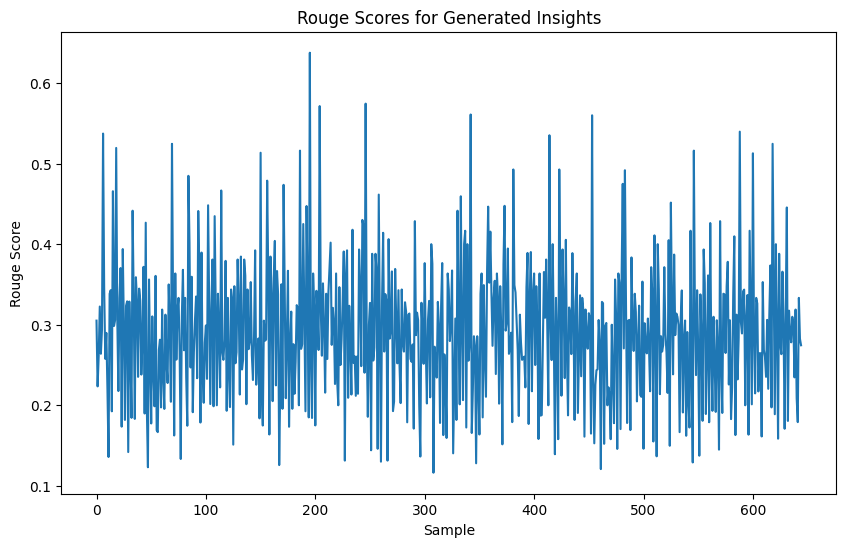

In [24]:
# prompt: analyze the rouge scores list. Get the minium and maximum, plot if possible

min_score = min(rouge_scores)
max_score = max(rouge_scores)
avg_score = np.mean(rouge_scores)

print(f"Minimum Rouge Score: {min_score}")
print(f"Maximum Rouge Score: {max_score}")
print(f"Average Rouge Score: {avg_score}")

# Plot the Rouge scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(rouge_scores)
plt.xlabel("Sample")
plt.ylabel("Rouge Score")
plt.title("Rouge Scores for Generated Insights")
plt.show()


In [35]:
full_qa_data['questions'][195]

"You are given a time series data containing percentage usage of cpu, ram and disk at a day level. Answer the question based on the tablular data.\n\nTabular Data:\n<?xml version='1.0' encoding='utf-8'?>\n<data>\n  <row>\n    <date_>2022-04-26 00:00:00</date_>\n    <cpu_usage/>\n    <ram_usage/>\n    <diskio_usage>15.68</diskio_usage>\n  </row>\n  <row>\n    <date_>2022-04-27 00:00:00</date_>\n    <cpu_usage/>\n    <ram_usage/>\n    <diskio_usage>16.5</diskio_usage>\n  </row>\n  <row>\n    <date_>2022-04-28 00:00:00</date_>\n    <cpu_usage/>\n    <ram_usage/>\n    <diskio_usage>10.4</diskio_usage>\n  </row>\n  <row>\n    <date_>2022-04-29 00:00:00</date_>\n    <cpu_usage/>\n    <ram_usage/>\n    <diskio_usage>11.02</diskio_usage>\n  </row>\n  <row>\n    <date_>2022-04-30 00:00:00</date_>\n    <cpu_usage/>\n    <ram_usage/>\n    <diskio_usage>10.99</diskio_usage>\n  </row>\n  <row>\n    <date_>2022-05-01 00:00:00</date_>\n    <cpu_usage/>\n    <ram_usage/>\n    <diskio_usage>11.55</disk

In [34]:
max_score_index = rouge_scores.index(max(rouge_scores))
print(max_score_index)

question = full_qa_data["questions"][max_score_index]
insight = full_qa_data["insights"][max_score_index]

# print("Question with the highest Rouge score:")
# print(question)

print("\nActual Insight:")
print(insight)

print("\nModel Response")
print(all_responses[max_score_index])

195

Actual Insight:
The data contains information about a user's daily disk IO usage on a computer from April 26, 2022, to May 14, 2022. It shows an overall increasing trend in disk IO usage over this period.

Model Response
 The data contains daily usage percentages of CPU, RAM, and Disk IO for the period from April 26, 2022, to May 14, 2022. It shows a general increasing trend in disk IO usage over time.

The CPU and RAM usage data is missing and cannot be analyzed.


In [25]:
# prompt: read all the pickle files and join them together in a single list

import pickle

files = ["model_responses_till_dev_16.pkl", "model_responses2.pkl", "model_responses3.pkl",]

all_responses = []

for file in files:
  with open(file, "rb") as f:
    responses = pickle.load(f)
    all_responses.extend(responses)

print(len(all_responses))


642


In [26]:
# get questions and answers

qa_df = df.query("question_0 != 0")[["device_name", "question_0", "insight_0", "question_1", "insight_1", "question_2", "insight_2",]]

full_qa_data = {"id": [], "questions": [], "insights": []}
for dev_name in df["device_name"].unique().tolist():
    if dev_name != "Device_191":
        for q_id in range(3):
            row = qa_df[qa_df["device_name"] == dev_name]
            table_data = hardware_data[dev_name].to_xml(index=False)
            question = f"You are given a time series data containing percentage usage of cpu, ram and disk at a day level. Answer the question based on the tablular data.\n\nTabular Data:\n{table_data}\nQuestion: {row[f'question_{q_id}'].values[0]}"
            answer = row[f"insight_{q_id}"].values[0]

            full_qa_data["id"].append(f"{dev_name}_Question_{q_id}")
            full_qa_data["questions"].append(question)
            full_qa_data["insights"].append(answer)

len(full_qa_data), len(full_qa_data["questions"])

(3, 642)

In [27]:
rouge = Rouge()

rouge_scores_xml = [rouge.get_scores(a, b)[0]["rouge-l"]["f"] for a, b in zip(full_qa_data["insights"], all_responses)]

Minimum Rouge Score: 0.13223140177856713
Maximum Rouge Score: 0.73015872515999
Average Rouge Score: 0.3377924919379517


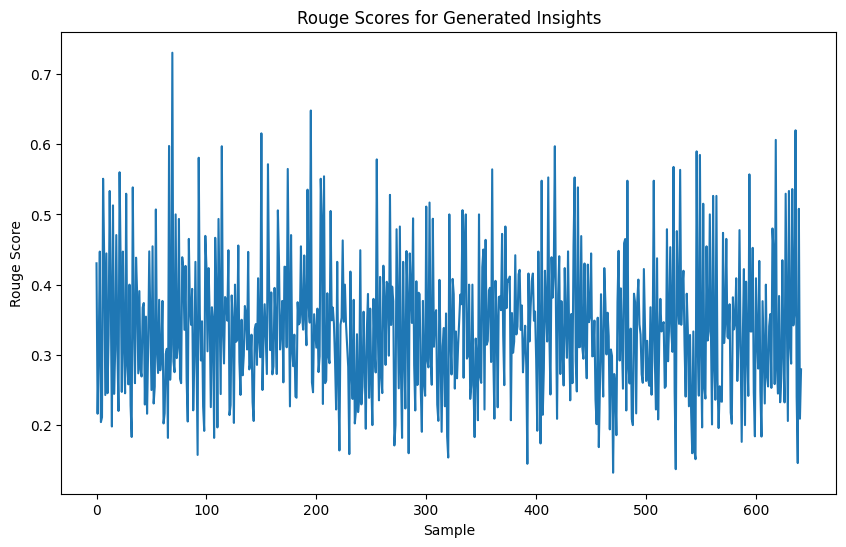

In [28]:
# prompt: analyze the rouge scores list. Get the minium and maximum, plot if possible

min_score = min(rouge_scores_xml)
max_score = max(rouge_scores_xml)
avg_score = np.mean(rouge_scores_xml)

print(f"Minimum Rouge Score: {min_score}")
print(f"Maximum Rouge Score: {max_score}")
print(f"Average Rouge Score: {avg_score}")

# Plot the Rouge scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(rouge_scores_xml)
plt.xlabel("Sample")
plt.ylabel("Rouge Score")
plt.title("Rouge Scores for Generated Insights")
plt.show()


In [31]:
# prompt: get the index of where the rouge_score_sml is maximum, check the full_qa_data for that index the questiona and the actual insight

max_score_index = rouge_scores_xml.index(max(rouge_scores_xml))

question = full_qa_data["questions"][max_score_index]
insight = full_qa_data["insights"][max_score_index]

# print("Question with the highest Rouge score:")
# print(question)

print("\nActual Insight:")
print(insight)

print("\nModel Response")
print(all_responses[max_score_index])


Actual Insight:
The data contains information about a user's computer usage, including CPU, RAM, and disk IO usage over various dates in March 2023. It shows fluctuations in resource usage, with a significant spike in CPU and disk IO usage on March 30th.

Model Response
 The data contains daily usage percentages of CPU, RAM, and Disk IO for the month of March 2023. It shows fluctuations in resource usage, with a significant spike in CPU and Disk IO usage on March 27th and March 30th.
